# TSP LP

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pulp import *
seed = 42
np.random.seed(seed=seed)

In [6]:
def gen_param(num):
    path = list(range(num))
    X = np.random.randint(1, 100, num)
    Y = np.random.randint(1, 100, num)
    XY = X + Y * 1j
    return num, path, X, Y, XY

In [7]:
# def gen_grid(W, H, noize=False):
#     num = W * H
#     path = np.concatenate([np.arange(num), [0]])
#     w = np.linspace(0, 1, W+2) 
#     h = np.linspace(0, 1, H+2)
#     X = []
#     nz = 0
#     for _ in h[1:-1]:
#         for i in w[1:-1]:
#             if noize:
#                 nz = np.random.random()*noize
#             X.append(i+nz) 
#     Y = []
#     for i in h[1:-1]:
#         for _ in w[1:-1]:
#             if noize:
#                 nz = np.random.random()*noize
#             Y.append(i+nz)
#     X = np.array(X)
#     Y = np.array(Y)
#     XY = X + Y * 1j
#     return num, path, X, Y, XY

In [8]:
def plot_path(path, size=6):
    plt.figure(figsize=(size, size))
    cmap = plt.get_cmap("tab10")
    plt.axis([0,100,0,100], 'equal')
    plt.plot(X[path], Y[path], alpha=0.5)
    plt.scatter(X[0], Y[0], s=80, c='r', marker='o')
    plt.scatter(X[1:], Y[1:], s=40, c=cmap(0), marker='o')
    for i in range(num):
        plt.text(X[i], Y[i]+1, s=i, fontsize=10, color='gray')

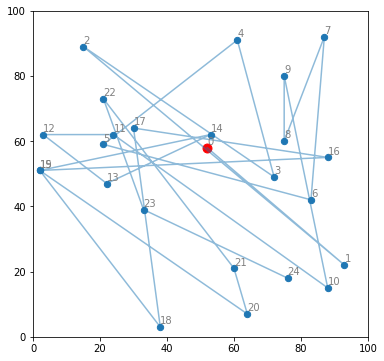

In [9]:
# Generate parameters and Plot initial path
num, path, X, Y, XY = gen_param(25)
plot_path(path)

## Linear Programming:

In [102]:
prob = LpProblem(name='TSP_LP', sense=LpMinimize)
dist = dict({(i, j): int(abs(XY[i] - XY[j])) for i in range(num) for j in range(num) if i != j})
x = LpVariable.dicts('x', dist, 0, 1, LpBinary)

In [103]:
cost = lpSum([dist[i,j] * x[i,j] for i, j in dist])
prob += cost

for j in path:
    prob += lpSum([x[i, j] for i in path if (i, j) in x]) == 1
    prob += lpSum([x[j, i] for i in path if (j, i) in x]) == 1

u = LpVariable.dicts('u', path, 0, num, LpInteger)

for i in path:
    for j in path:
        if i != j and (i != path[0] and j != path[0]) and (i, j) in x:
            prob += u[i] - u[j] <= (num) * (1 - x[(i, j)]) - 1

In [104]:
%time prob.solve()
print(LpStatus[prob.status])

CPU times: user 21.2 ms, sys: 8.03 ms, total: 29.2 ms
Wall time: 53 s
Optimal


In [105]:
path_copy = path.copy()
tour = [path[0]]
path_copy.remove(tour[-1])

while len(path_copy) > 0:
    for j in path_copy:
        if x[(tour[-1], j)].varValue == 1:
            tour.append(j)
            path_copy.remove(j)
            break

tour += [path[0]]
tour_dist = [dist[(tour[k - 1], tour[k])] for k in range(1, len(tour))]

tour         : [0, 17, 11, 5, 22, 2, 12, 15, 19, 13, 23, 18, 20, 21, 24, 10, 1, 6, 16, 3, 8, 9, 7, 4, 14, 0]
tour distance: 407


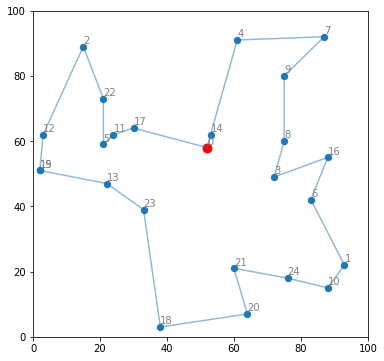

In [106]:
print('tour         :', tour)
print('tour distance:', sum(tour_dist))
plot_path(tour)

In [89]:
# path_copy = path.copy()
# zero = path[0]
# tour = [zero]
# path_copy.remove(path[0])

# while len(path_copy) > 0:
#     for j in path_copy:
#         if x[(zero, j)].varValue == 1:
#             tour.append(path_copy.pop(path_copy.index(j)))
#             zero = j
#             break

# tour += [path[0]]
# tour_dist = [dist[(tour[i - 1], tour[i])] for i in range(1, len(tour))]

In [99]:
C = np.matrix('1,1,1,1,1,1')
C

matrix([[1, 1, 1, 1, 1, 1]])

In [91]:
tour

[0, 6, 8, 7, 1, 3, 9, 5, 2, 4, 0]